Questão 2 - Método de Runge-Kutta 4, aplicado em equações de estado.

### Bibliotecas importadas


In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Equações de Estado do CKT

A seguinte celula do programa define as equações de estado que regem o circuito do problema.


In [6]:
def Eq_Estados(t, X, R, L, C, E_i):
    
    i_L = X[0] 
    v_C = X[1] 
    
    
    di_dt = (-R/L) * i_L - (1/L) * v_C + (1/L) * E_i
    dv_dt = (1/C) * i_L
    
    return np.array([di_dt, dv_dt])

### Algoritmo para Runge-Kutta de 4ª Ordem 

O Método de Runge-Kutta de quarta ordem é obtido considerando a série de Taylor para y, desenvolvida até o termo de ordem quatro. O algoritmo calcula quatro estimativas de inclinação ($k_1, k_2, k_3, k_4$) em diferentes pontos dentro do passo de integração $h$. O próximo valor da variável de estado, $y_{i+1}$, é determinado por uma média ponderada dessas inclinações, conforme a equação recursiva:

$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$




In [7]:
def runge_kutta_4(t_val, y0, R, L, C, E1, E2, t_chave):
    
    h = t_val[1] - t_val[0] # Identifica o passo de integração
    N = len(t_val)
    
    Y = np.zeros((N, 2))
    Y[0] = y0
    
    # O print f"..." está correto para Python 3
    print(f"Iniciando simulação: R={R} Ohm, C={C} F...")
    
    # Condição para mudança da chave
    def get_E(t_atual):
        if t_atual < t_chave:
            return E1
        else:
            return E2
    
    for k in range(N - 1):
        t = t_val[k]
        y_atual = Y[k]
            
        # Cálculo dos coeficientes k do RK4
        
        # k1: inclinação no início do intervalo (t)
        k1 = Eq_Estados(t, y_atual, R, L, C, get_E(t))
        
        # k2: inclinação no meio do intervalo (t + h/2)
        k2 = Eq_Estados(t + h/2, y_atual + (h/2)*k1, R, L, C, get_E(t + h/2))
        
        # k3: inclinação no meio do intervalo (t + h/2) corrigida por k2
        k3 = Eq_Estados(t + h/2, y_atual + (h/2)*k2, R, L, C, get_E(t + h/2))
        
        # k4: inclinação no final do intervalo (t + h)
        k4 = Eq_Estados(t + h, y_atual + h*k3, R, L, C, get_E(t + h))
        
        # Atualiza o estado para o próximo instante (k+1)
        Y[k+1] = y_atual + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        
    return Y

<>:52: SyntaxWarning: invalid escape sequence '\O'
<>:52: SyntaxWarning: invalid escape sequence '\O'
C:\Users\User\AppData\Local\Temp\ipykernel_16472\426353252.py:52: SyntaxWarning: invalid escape sequence '\O'
  ax.set_title(f"{nome}\n(R={R_teste}$\Omega$, C={C_teste}F)")


Iniciando simulação: R=1.0 Ohm, C=1.0 F...
Iniciando simulação: R=1.0 Ohm, C=0.08 F...
Iniciando simulação: R=1.0 Ohm, C=1.2 F...
Iniciando simulação: R=0.0 Ohm, C=0.08 F...


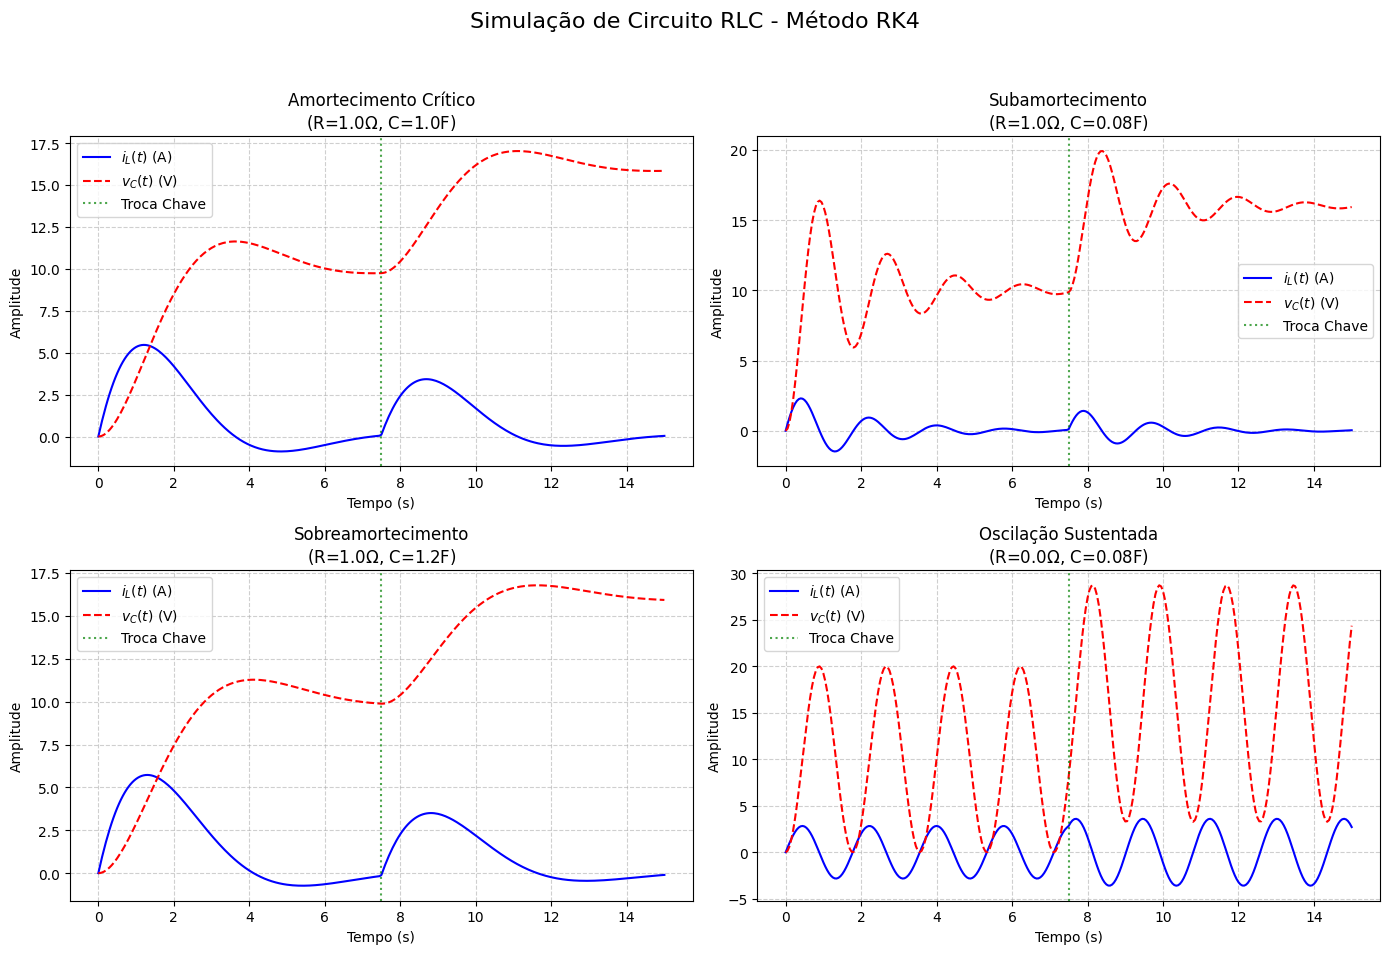

In [8]:

t_max = 15.0          # Tempo total (s)
h = 0.05              # Passo de integração (s)
t_chave = t_max / 2   # Momento da troca da chave (7.5s)
L_val = 1.0           # Indutância (H)
E1_val = 10.0         # Fonte posição 'a' (V)
E2_val = 16.0         # Fonte posição 'b' (V)

# Vetor de tempo e condições iniciais
t_val = np.arange(0, t_max + h, h)
y0 = [0.0, 0.0] # i_L(0)=0, v_C(0)=0

# Definição dos 4 casos solicitados no enunciado
# Formato: [Nome do Caso, Valor de C, Valor de R]
casos = [
    ["Amortecimento Crítico", 1.0, 1.0],      # C=1F, R=1
    ["Subamortecimento",      0.08, 1.0],     # C=0.08F, R=1
    ["Sobreamortecimento",    1.2, 1.0],      # C=1.2F, R=1
    ["Oscilação Sustentada",  0.08, 0.0]      # C=0.08F, R=0 (Sem resistência)
]

# ---------------------------------------------------------
# AQUI COMEÇA A PARTE DO FIG, AXS QUE VOCÊ PERGUNTOU
# ---------------------------------------------------------

# Cria uma figura com 4 subgráficos (2 linhas, 2 colunas)
# figsize define o tamanho da imagem (largura, altura)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Simulação de Circuito RLC - Método RK4', fontsize=16)

# Loop para rodar e plotar cada caso
for i, (nome, C_teste, R_teste) in enumerate(casos):
    
    # 1. Executa a simulação chamando SUA função RK4
    # Note que passamos os valores R_teste e C_teste do loop
    resultado = runge_kutta_4(t_val, y0, R_teste, L_val, C_teste, E1_val, E2_val, t_chave)
    
    # 2. Separa os resultados (Coluna 0 = Corrente, Coluna 1 = Tensão)
    i_L_res = resultado[:, 0] 
    v_C_res = resultado[:, 1] 
    
    # 3. Lógica para escolher o gráfico certo na matriz 2x2
    # i // 2 dá a linha (0 ou 1)
    # i % 2 dá a coluna (0 ou 1)
    ax = axs[i // 2, i % 2]
    
    # Plota as curvas
    ax.plot(t_val, i_L_res, label='$i_L(t)$ (A)', color='blue', linewidth=1.5)
    ax.plot(t_val, v_C_res, label='$v_C(t)$ (V)', color='red', linestyle='--', linewidth=1.5)
    
    # Detalhes visuais do gráfico
    ax.axvline(x=t_chave, color='green', linestyle=':', label='Troca Chave', alpha=0.7)
    ax.set_title(f"{nome}\n(R={R_teste}$\Omega$, C={C_teste}F)")
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Ajusta o espaçamento para não sobrepor textos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()